<a href="https://colab.research.google.com/github/priyankkalgaonkar/Predictive-Analysis-Using-Feature-Engineering/blob/master/Predictive_Analysis_Using_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate "https://datahack-prod.s3.amazonaws.com/train_file/Train_UWu5bXk.csv" -O "/srv/train.csv"
!wget --no-check-certificate "https://datahack-prod.s3.amazonaws.com/test_file/Test_u94Q5KV.csv" -O "/srv/test.csv"

In [0]:
import pandas as pd
train=pd.read_csv('/srv/train.csv') #Loading train.csv
test=pd.read_csv('/srv/test.csv')  #Loading test.csv

In [0]:
train.head(4) #Checking if train.csv has data

In [0]:
test.head(5) #Checking if test.csv has data

In [0]:
train.isnull().sum() #Finding Null Values in train.csv

In [0]:
test.isnull().sum() #Finding Null Values in test.csv

Since we have null values in `Item_Weight` and `Outlet_Size` columns in both: train and test files, we will fill the `Item_Weight` gaps with the average weight and `Outlet_Size` with `unknown` value.

In [0]:
#Filling Null Values in test.csv
test['Item_Weight'].fillna(value=test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(value='Unknown', inplace=True)

#Filling Null Values in train.csv
train['Item_Weight'].fillna(value=test['Item_Weight'].mean(),inplace=True)
train['Outlet_Size'].fillna(value='Unknown', inplace=True)

#We'll know check to verify if all Null Values have been filled

train.isnull().sum()

In [0]:
test.isnull().sum()

In [0]:
test['Item_Type'].value_counts() #Counts # of items of a particular type

ValueError: ignored

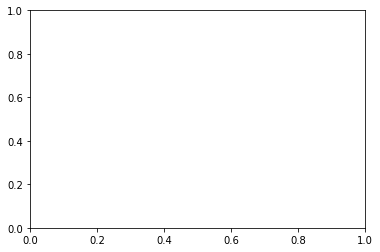

In [49]:
test['Item_Type'].value_counts()
import numpy as np
import matplotlib.pyplot as plot
plot.bar(test['Item_Type'].index.value_counts(), test['Item_Type'].value_counts(), width=0.5, bottom=None, align='center', data=test)
plot.title('Graph for Test.csv')
plot.xticks(rotation='vertical')
plot.xlabel('Item_Type')
plot.ylabel('Count')
print('Item_Type:\n', test['Item_Type'].value_counts())